In [1]:
from lcz_classification.functions_ext import *
from lcz_classification.dataset import fetch_metadata
from lcz_classification.plots import plot_confusion_matrix
import matplotlib.pyplot as plt
import  seaborn as sns
from lcz_classification.config import * 
import geopandas as gpd

lcz_gen_cm_fp="../data/toronto/raw/lcz_wudapt/data/db37392fab7b93643f0b5812bdf84487161a99c9_cm_average_formatted.csv"
lcz_legend = fetch_metadata('LCZ_LEGEND')


lcz_gdf=gpd.read_file(LCZ_FP)
class_ids=sorted(lcz_gdf['Name'].unique())

classes=[int(lcz_legend.set_index('class_id').loc[cl]['class']) for cl in class_ids]
labels=[lcz_legend.set_index('class_id').loc[cl]['name'] for cl in class_ids]

legend = {
    2: ['Compact mid-rise', '#D10000'],
    3: ['Compact low-rise', '#CD0000'],
    5: ['Open mid-rise', '#FF6600'],
    6: ['Open low-rise', '#FF9955'],
    8: ['Large low-rise', '#BCBCBC'],
    101: ['Dense trees', '#006A00'],
    102: ['Scattered trees', '#00AA00'],
    104: ['Low plants', '#B9DB79'],
    105: ['Bare rock or paved', '#545454'],
    106: ['Bare soil or sand', '#FBF7AF'],
    107: ['Water', '#6A6AFF']
}


- Parent directory for Toronto already exists, retrievine folder paths...
- Folder paths for Toronto retrieved.


## Plot Confusion Matrix of LCZ Generator

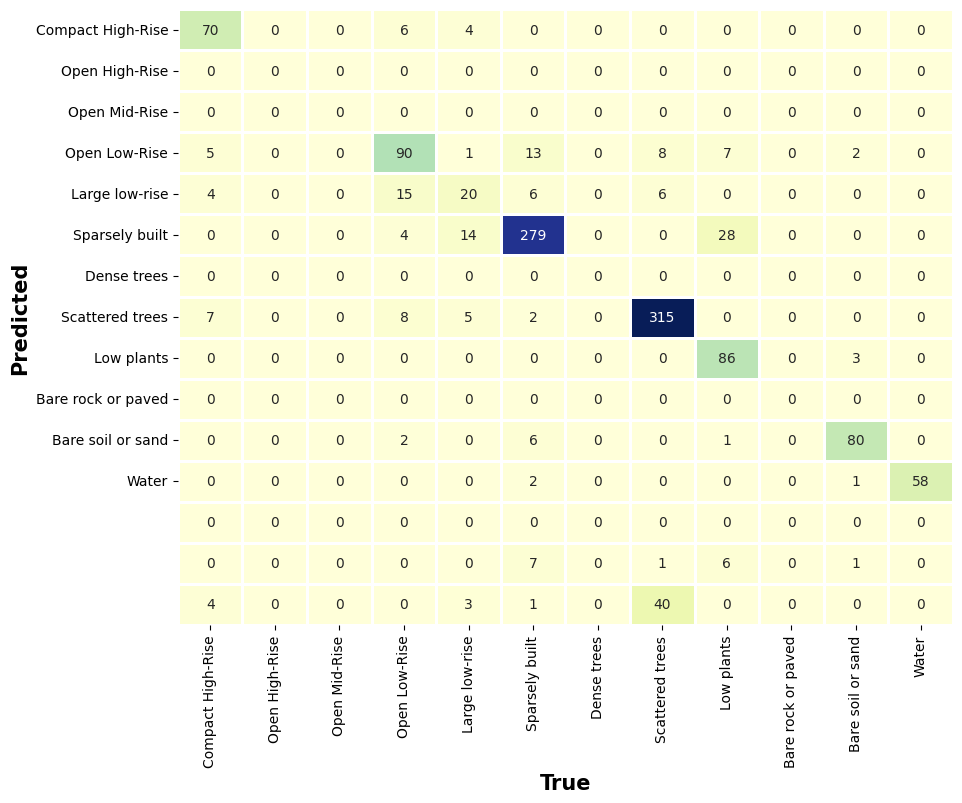

In [32]:
cm=pd.read_csv(lcz_gen_cm_fp).drop(columns=['Unnamed: 0'])

idx2 = [x for x in range(0,len(classes))]
cm=cm.iloc[:,idx2].values



mask = cm == 0.0

plt.figure(figsize=(10,8))
fmt=".0f"

# if as_percent:
#     cm=(cm / len(y_test)) * 100
#     fmt=".1f"

sns.heatmap(cm, 
            annot=True, 
            fmt=fmt, 
            cmap="YlGnBu",
            cbar=False,
            xticklabels=labels, 
            yticklabels=labels, 
            # mask=mask,
            linewidths=1,
            linecolor='white'
            
            )
plt.xlabel("True",  fontdict=dict(size = 15, weight ='bold'))
plt.ylabel("Predicted",  fontdict=dict(size = 15, weight ='bold'))
# plt.title(title, fontdict=dict(size = 12, weight ='bold'), loc='center', pad=20, x= 0.4)
plt.legend([],[], frameon=False)


## Intercomparison with LCZ Generator

In [3]:

# Match LCZ Generator Raster to LCZ Classification Map from Sentinel-2 + UCPs

import rioxarray as rio
ref=r'D:\GeoAI\projects\lcz_classification\data\toronto\raw\lcz_wudapt\db37392fab7b93643f0b5812bdf84487161a99c9.tif'
ref_matched_fp='../data/toronto/processed/lcz_benchmark/lcz_benchmark_30m.tif'
s2_lcz_fp="../data/toronto/processed/classification/classified_30m.tif"

ref_lcz=rio.open_rasterio(ref)
s2_lcz=rio.open_rasterio(s2_lcz_fp)


ref_lcz=ref_lcz.sel(band=1).rio.reproject_match(s2_lcz)
del ref_lcz.attrs['long_name']
ref_lcz.rio.to_raster('../data/toronto/processed/lcz_benchmark/lcz_benchmark_30m.tif')


# s2_lcz='../data/'
# inter_comparison()

In [5]:
## Intercompirson Analysis

inter_comparison(s2_lcz_fp,ref_matched_fp, legend)

Test samples shape: (1914579,)
Classified samples shape: (1914579,)
Accuracy: 0.650


(0.6497778362762779,
 array([[  7773,    383,    870,    141,   2827,      0,      0,      0,
             36,    296,    126,     20],
        [  4324,  38507,  10678,  43418,  16441,   6781,   1666,   1158,
           2999,   1928,   2441,    324],
        [  1926,   6976,  13046,   7100,   4642,    589,     66,     29,
            321,    233,    458,      8],
        [  1530,  49405,  24279, 380879,  22412,  29314,   3459,   1228,
           3078,    787,   1464,    142],
        [ 14570,  24114,  29467,  13115, 145937,   4099,    360,    303,
           5548,   8734,   5883,    187],
        [    26,  17041,    472,  27833,    999,  35788,  21038,   5360,
           7289,    222,   2638,    125],
        [     0,   7269,    142,   5731,    124,   8577,  76404,   3000,
           2184,     80,    874,    188],
        [     0,   1925,     76,   3474,    216,   4681,   4711,  12703,
           4246,     69,   7315,     15],
        [    69,   6390,   1606,  16256,   6356,  34990,  1